# AdaBoost Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Travel.csv')

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [6]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [7]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

## Preprosessing

In [8]:
df['CityTier'].value_counts()

CityTier
1    3190
3    1500
2     198
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [10]:
df['Gender']=df['Gender'].replace('Fe Male','Female')

In [11]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [12]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [13]:
df['Total_visiting']=df['NumberOfPersonVisiting']+df['NumberOfChildrenVisiting']
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Total_visiting
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,3.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,5.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,3.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,3.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,2.0


In [14]:
df.drop(["NumberOfPersonVisiting",'NumberOfChildrenVisiting'],axis=1,inplace=True)
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Total_visiting
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [15]:
df["Occupation"].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [16]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [17]:
df['MaritalStatus']=df['MaritalStatus'].replace('Unmarried','Single')
df['MaritalStatus'].value_counts()

MaritalStatus
Married     2340
Single      1598
Divorced     950
Name: count, dtype: int64

In [18]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [19]:
df['Designation'].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

In [20]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Total_visiting
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [21]:
df.drop("CustomerID",axis=1,inplace=True)
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Total_visiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


## Handling missing values

In [22]:
df.duplicated().sum()

np.int64(141)

In [23]:
df.drop_duplicates(keep="first",inplace=True)

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
df.isnull().sum()

ProdTaken                   0
Age                       216
TypeofContact              25
CityTier                    0
DurationOfPitch           246
Occupation                  0
Gender                      0
NumberOfFollowups          44
ProductPitched              0
PreferredPropertyStar      26
MaritalStatus               0
NumberOfTrips             138
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
Designation                 0
MonthlyIncome             224
Total_visiting             60
dtype: int64

In [26]:
df['PreferredPropertyStar'].value_counts()

PreferredPropertyStar
3.0    2905
5.0     938
4.0     878
Name: count, dtype: int64

## Filling In Missing Values

In [27]:
#Age
df.Age.fillna(df.Age.median(), inplace=True)

#TypeofContract
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

#DurationOfPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

#NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

#PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

#NumberOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

#NumberOfChildrenVisiting
df.Total_visiting.fillna(df.Total_visiting.mode()[0], inplace=True)

#MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

/var/folders/2k/8vzgz7956m1g7pgnx2b1zplr0000gn/T/ipykernel_9313/3798843344.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.median(), inplace=True)
/var/folders/2k/8vzgz7956m1g7pgnx2b1zplr0000gn/T/ipykernel_9313/3798843344.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [28]:
df.isnull().sum()

ProdTaken                 0
Age                       0
TypeofContact             0
CityTier                  0
DurationOfPitch           0
Occupation                0
Gender                    0
NumberOfFollowups         0
ProductPitched            0
PreferredPropertyStar     0
MaritalStatus             0
NumberOfTrips             0
Passport                  0
PitchSatisfactionScore    0
OwnCar                    0
Designation               0
MonthlyIncome             0
Total_visiting            0
dtype: int64

## Feature Extraction

In [29]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Total_visiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [30]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Designation', 'MonthlyIncome',
       'Total_visiting'],
      dtype='object')

## OneHot Encoding & Standardizing the numerical data

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4747 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProdTaken               4747 non-null   int64  
 1   Age                     4747 non-null   float64
 2   TypeofContact           4747 non-null   object 
 3   CityTier                4747 non-null   int64  
 4   DurationOfPitch         4747 non-null   float64
 5   Occupation              4747 non-null   object 
 6   Gender                  4747 non-null   object 
 7   NumberOfFollowups       4747 non-null   float64
 8   ProductPitched          4747 non-null   object 
 9   PreferredPropertyStar   4747 non-null   float64
 10  MaritalStatus           4747 non-null   object 
 11  NumberOfTrips           4747 non-null   float64
 12  Passport                4747 non-null   int64  
 13  PitchSatisfactionScore  4747 non-null   int64  
 14  OwnCar                  4747 non-null   int64

In [32]:
# numerical data
num_data=[feature for feature in df.columns if df[feature].dtype != 'O']
print(f"Number of numerical columns in the dataset are: {len(num_data)}")

Number of numerical columns in the dataset are: 12


In [33]:
# categorcial data
cat_data=[feature for feature in df.columns if df[feature].dtype == 'O']
print(f"Number of categorical columns in the dataset are: {len(cat_data)}")

Number of categorical columns in the dataset are: 6


In [34]:
# discrete data 
dis_data=[feature for feature in num_data if len(df[feature].unique()) <=25]
print(f"Number of Discete columns in the dataset are: {len(dis_data)}")

Number of Discete columns in the dataset are: 9


In [35]:
# continuous data 
cont_data=[feature for feature in num_data if len(df[feature].unique()) >25]
print(f"Number of Continous columns in the dataset are: {len(cont_data)}")

Number of Continous columns in the dataset are: 3


## Train Test Split

In [36]:
X=df.drop('ProdTaken',axis=1)
y=df['ProdTaken']

In [37]:
X

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Total_visiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.0,Self Enquiry,3,9.0,Small Business,Male,5.0,Deluxe,4.0,Single,2.0,1,1,1,Manager,26576.0,4.0
4884,28.0,Company Invited,1,31.0,Salaried,Male,5.0,Basic,3.0,Single,3.0,1,3,1,Executive,21212.0,6.0
4885,52.0,Self Enquiry,3,17.0,Salaried,Female,4.0,Standard,4.0,Married,7.0,0,1,1,Senior Manager,31820.0,7.0
4886,19.0,Self Enquiry,3,16.0,Small Business,Male,4.0,Basic,3.0,Single,3.0,0,5,0,Executive,20289.0,5.0


In [38]:
y.value_counts()

ProdTaken
0    3853
1     894
Name: count, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [40]:
# Create Column Transformer with 3 types of transformers
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
         ("OneHotEncoder", oh_transformer, cat_features),
          ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [41]:
# applying transformation to x_train
X_train=preprocessor.fit_transform(X_train)

In [42]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.468706,-0.541564,0.301850,0.521298,-0.671852,1.578976,1.405124,-1.291616,-0.240455,-1.505779
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.468706,-0.782436,0.301850,1.768957,-0.123879,-0.633322,-1.502723,0.774224,2.269019,1.326723
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.713822,-1.143745,-0.695906,0.521298,-0.671852,-0.633322,1.405124,0.774224,-0.411433,-0.797654
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.713822,-0.782436,1.299606,-0.726362,-0.123879,-0.633322,0.678162,0.774224,0.159302,0.618597
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.713822,-1.023309,1.299606,1.768957,-0.671852,-0.633322,0.678162,-1.291616,1.961111,-0.089528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.713822,-0.059819,-1.693662,-0.726362,2.068012,-0.633322,-0.048800,0.774224,0.047999,2.034848
3318,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.468706,-0.902873,-0.695906,1.768957,-1.219825,-0.633322,1.405124,0.774224,1.496254,-0.089528
3319,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.713822,1.746723,0.301850,1.768957,-0.123879,1.578976,-0.775761,0.774224,-0.240455,-0.089528
3320,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.713822,-0.180255,0.301850,-0.726362,-0.123879,-0.633322,1.405124,0.774224,0.196341,0.618597


In [43]:
X_test=preprocessor.transform(X_test)

## Adaboost Classification Implementation

In [44]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [45]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost Classifier":AdaBoostClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.8429
- F1 score: 0.8164
- Precision: 0.6963
- Recall: 0.2994
- Roc Auc Score: 0.6345
----------------------------------
Model performance for Test set
- Accuracy: 0.8400
- F1 score: 0.8160
- Precision: 0.6508
- Recall: 0.3083
- Roc Auc Score: 0.6352


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9165
- F1 score: 0.9158
- Precision: 0.7882
- Recall: 0.7556
- Roc Auc Score: 0.8545


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9284
- F1 score: 0.9234
- Precision: 0.9362
- Recall: 0.6617
- Roc Auc Score: 0.8257


Gradient Boost
Model performance for Training se

## Hyperparameter Tuning

In [46]:
## Hyperparameter Training
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}
adaboost_param={
    "n_estimators":[50,60,70,80,90],
    "algorithm":['SAMME','SAMME.R']
}

In [47]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [48]:
adaboost_param

{'n_estimators': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']}

In [49]:
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params),
                   ("Adaboost", AdaBoostClassifier(), adaboost_param)
                   
                   ]

In [50]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('Adaboost',
  AdaBoostClassifier(),
  {'n_estimators': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']})]

In [51]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=5, max_features=auto, min_samples_split=20, n_estimators=1000; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=20, n_estimators=1000; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=20, n_estimators=1000; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=2, n_estimators=500; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_f

/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
78 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py", line 436, in _validate_params

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...................algorithm=SAMME, n_estimators=50; total time=   0.3s
[CV] END ...................algorithm=SAMME, n_estimators=50; total time=   0.3s
[CV] END ...................algorithm=SAMME, n_estimators=50; total time=   0.3s
[CV] END ...................algorithm=SAMME, n_estimators=60; total time=   0.3s
[CV] END ...................algorithm=SAMME, n_estimators=60; total time=   0.3s
[CV] END ...................algorithm=SAMME, n_estimators=60; total time=   0.4s
[CV] END ...................algorithm=SAMME, n_estimators=70; total time=   0.3s
[CV] END ...................algorithm=SAMME, n_estimators=70; total time=   0.4s
[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   0.0s
[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   0.0s
[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   0.0s
[CV] END .................algorithm=SAMME.R, n_e

/opt/anaconda3/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorith

[CV] END ...................algorithm=SAMME, n_estimators=70; total time=   0.4s
[CV] END ...................algorithm=SAMME, n_estimators=80; total time=   0.4s
[CV] END ...................algorithm=SAMME, n_estimators=80; total time=   0.4s
[CV] END ...................algorithm=SAMME, n_estimators=80; total time=   0.5s
[CV] END ...................algorithm=SAMME, n_estimators=90; total time=   1.1s
[CV] END ...................algorithm=SAMME, n_estimators=90; total time=   1.2s
[CV] END ...................algorithm=SAMME, n_estimators=90; total time=   1.2s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py", line 436, in _validate_params


---------------- Best Params for RF -------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}
---------------- Best Params for Adaboost -------------------
{'n_estimators': 70, 'algorithm': 'SAMME'}


## Training the Adaboost with the best params

In [52]:
model2=AdaBoostClassifier(n_estimators= 70, algorithm= 'SAMME')

In [53]:
model2.fit(X_train,y_train)
y2_pred=model2.predict(X_test)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


In [54]:


# Training set performance
model_accuracy = accuracy_score(y_test, y2_pred) # Calculate Accuracy
model_f1 = f1_score(y_test, y2_pred, average='weighted') # Calculate F1-score
model_precision = precision_score(y_test, y2_pred) # Calculate Precision
model_recall = recall_score(y_test, y2_pred) # Calculate Recall
model_rocauc_score = roc_auc_score(y_test, y2_pred)


print(list(models.keys())[i])
    
print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_accuracy))
print('- F1 score: {:.4f}'.format(model_f1))
    
print('- Precision: {:.4f}'.format(model_precision))
print('- Recall: {:.4f}'.format(model_recall))
print('- Roc Auc Score: {:.4f}'.format(model_rocauc_score))

print('='*35)
print('\n')

Adaboost Classifier
Model performance for Training set
- Accuracy: 0.8491
- F1 score: 0.8151
- Precision: 0.8072
- Recall: 0.2519
- Roc Auc Score: 0.6190




/opt/anaconda3/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


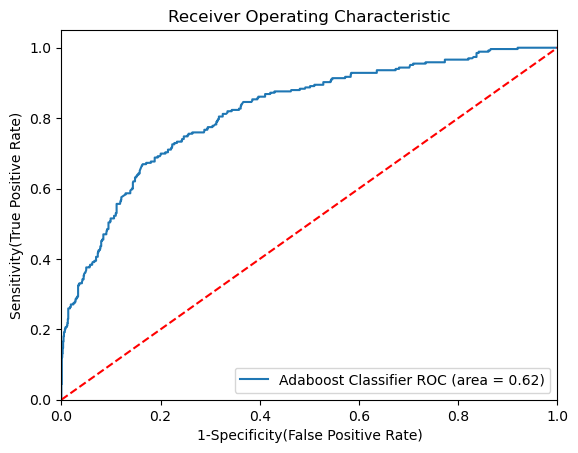

In [55]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Adaboost Classifier',
    'model': AdaBoostClassifier(n_estimators= 70, algorithm= 'SAMME'),
    'auc':  0.6190
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 